In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report

In [36]:
surya = pd.read_csv('Company_Data.csv')
surya

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [37]:
surya['Sales'].max()

16.27

In [38]:
surya.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [39]:
surya.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [40]:
surya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [41]:
surya.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [42]:
surya.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [43]:
#sn.pairplot(surya)

In [44]:
surya.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [45]:
surya=pd.get_dummies(surya,columns=['Urban','US'],drop_first=True)

In [46]:
surya

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [47]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
surya['ShelveLoc']= le.fit_transform(surya['ShelveLoc'])

In [48]:
surya

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [49]:
surya['Sales'].max()

16.27

In [50]:
for labels in range(0,len(surya['Sales'])):
    if surya['Sales'].iloc[labels]<=8:
        surya['Sales'].iloc[labels]='Low'
    else:
        surya['Sales'].iloc[labels]='high'

In [51]:
surya

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,high,138,73,11,276,120,0,42,17,1,1
1,high,111,48,16,260,83,1,65,10,1,1
2,high,113,35,10,269,80,2,59,12,1,1
3,Low,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,1,33,14,1,1
396,Low,139,23,3,37,120,2,55,11,0,1
397,Low,162,26,12,368,159,2,40,18,1,1
398,Low,100,79,7,284,95,0,50,12,1,1


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x= surya.iloc[:,1:]
y = surya['Sales']

In [54]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [55]:
y

0      high
1      high
2      high
3       Low
4       Low
       ... 
395    high
396     Low
397     Low
398     Low
399    high
Name: Sales, Length: 400, dtype: object

In [56]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [57]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[4] <= 92.5\nentropy = 0.969\nsamples = 320\nvalue = [193, 127]'),
 Text(0.25, 0.625, 'x[5] <= 0.5\nentropy = 0.675\nsamples = 45\nvalue = [8, 37]'),
 Text(0.125, 0.375, 'x[1] <= 57.0\nentropy = 1.0\nsamples = 12\nvalue = [6, 6]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.375, 0.375, 'x[0] <= 101.0\nentropy = 0.33\nsamples = 33\nvalue = [2, 31]'),
 Text(0.3125, 0.125, 'entropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.75, 0.625, 'x[5] <= 0.5\nentropy = 0.912\nsamples = 275\nvalue = [185, 90]'),
 Text(0.625, 0.375, 'x[1] <= 101.0\nentropy = 0.334\nsamples = 65\nvalue = [61, 4]'),
 Text(0.5625, 0.125, 'entropy = 0.133\nsamples = 54\nvalue = [53, 1]'),
 Text(0.6875, 0.125, 'entropy = 0.845\nsamples = 11\nvalue = [8, 3]'),
 Text(0.875, 0.375, 'x[2] <= 6.5\nentropy = 0.976\nsamples = 210\nvalu

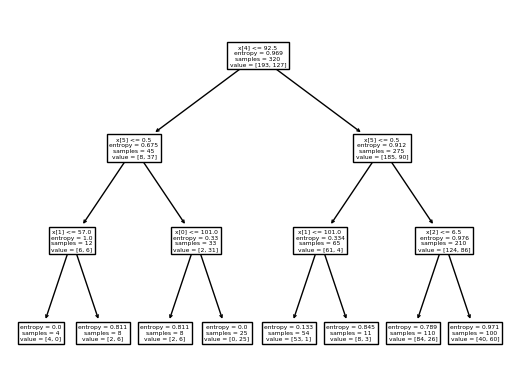

In [58]:
import warnings
warnings.filterwarnings('ignore')
tree.plot_tree(model)

In [59]:
surya.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes'],
      dtype='object')

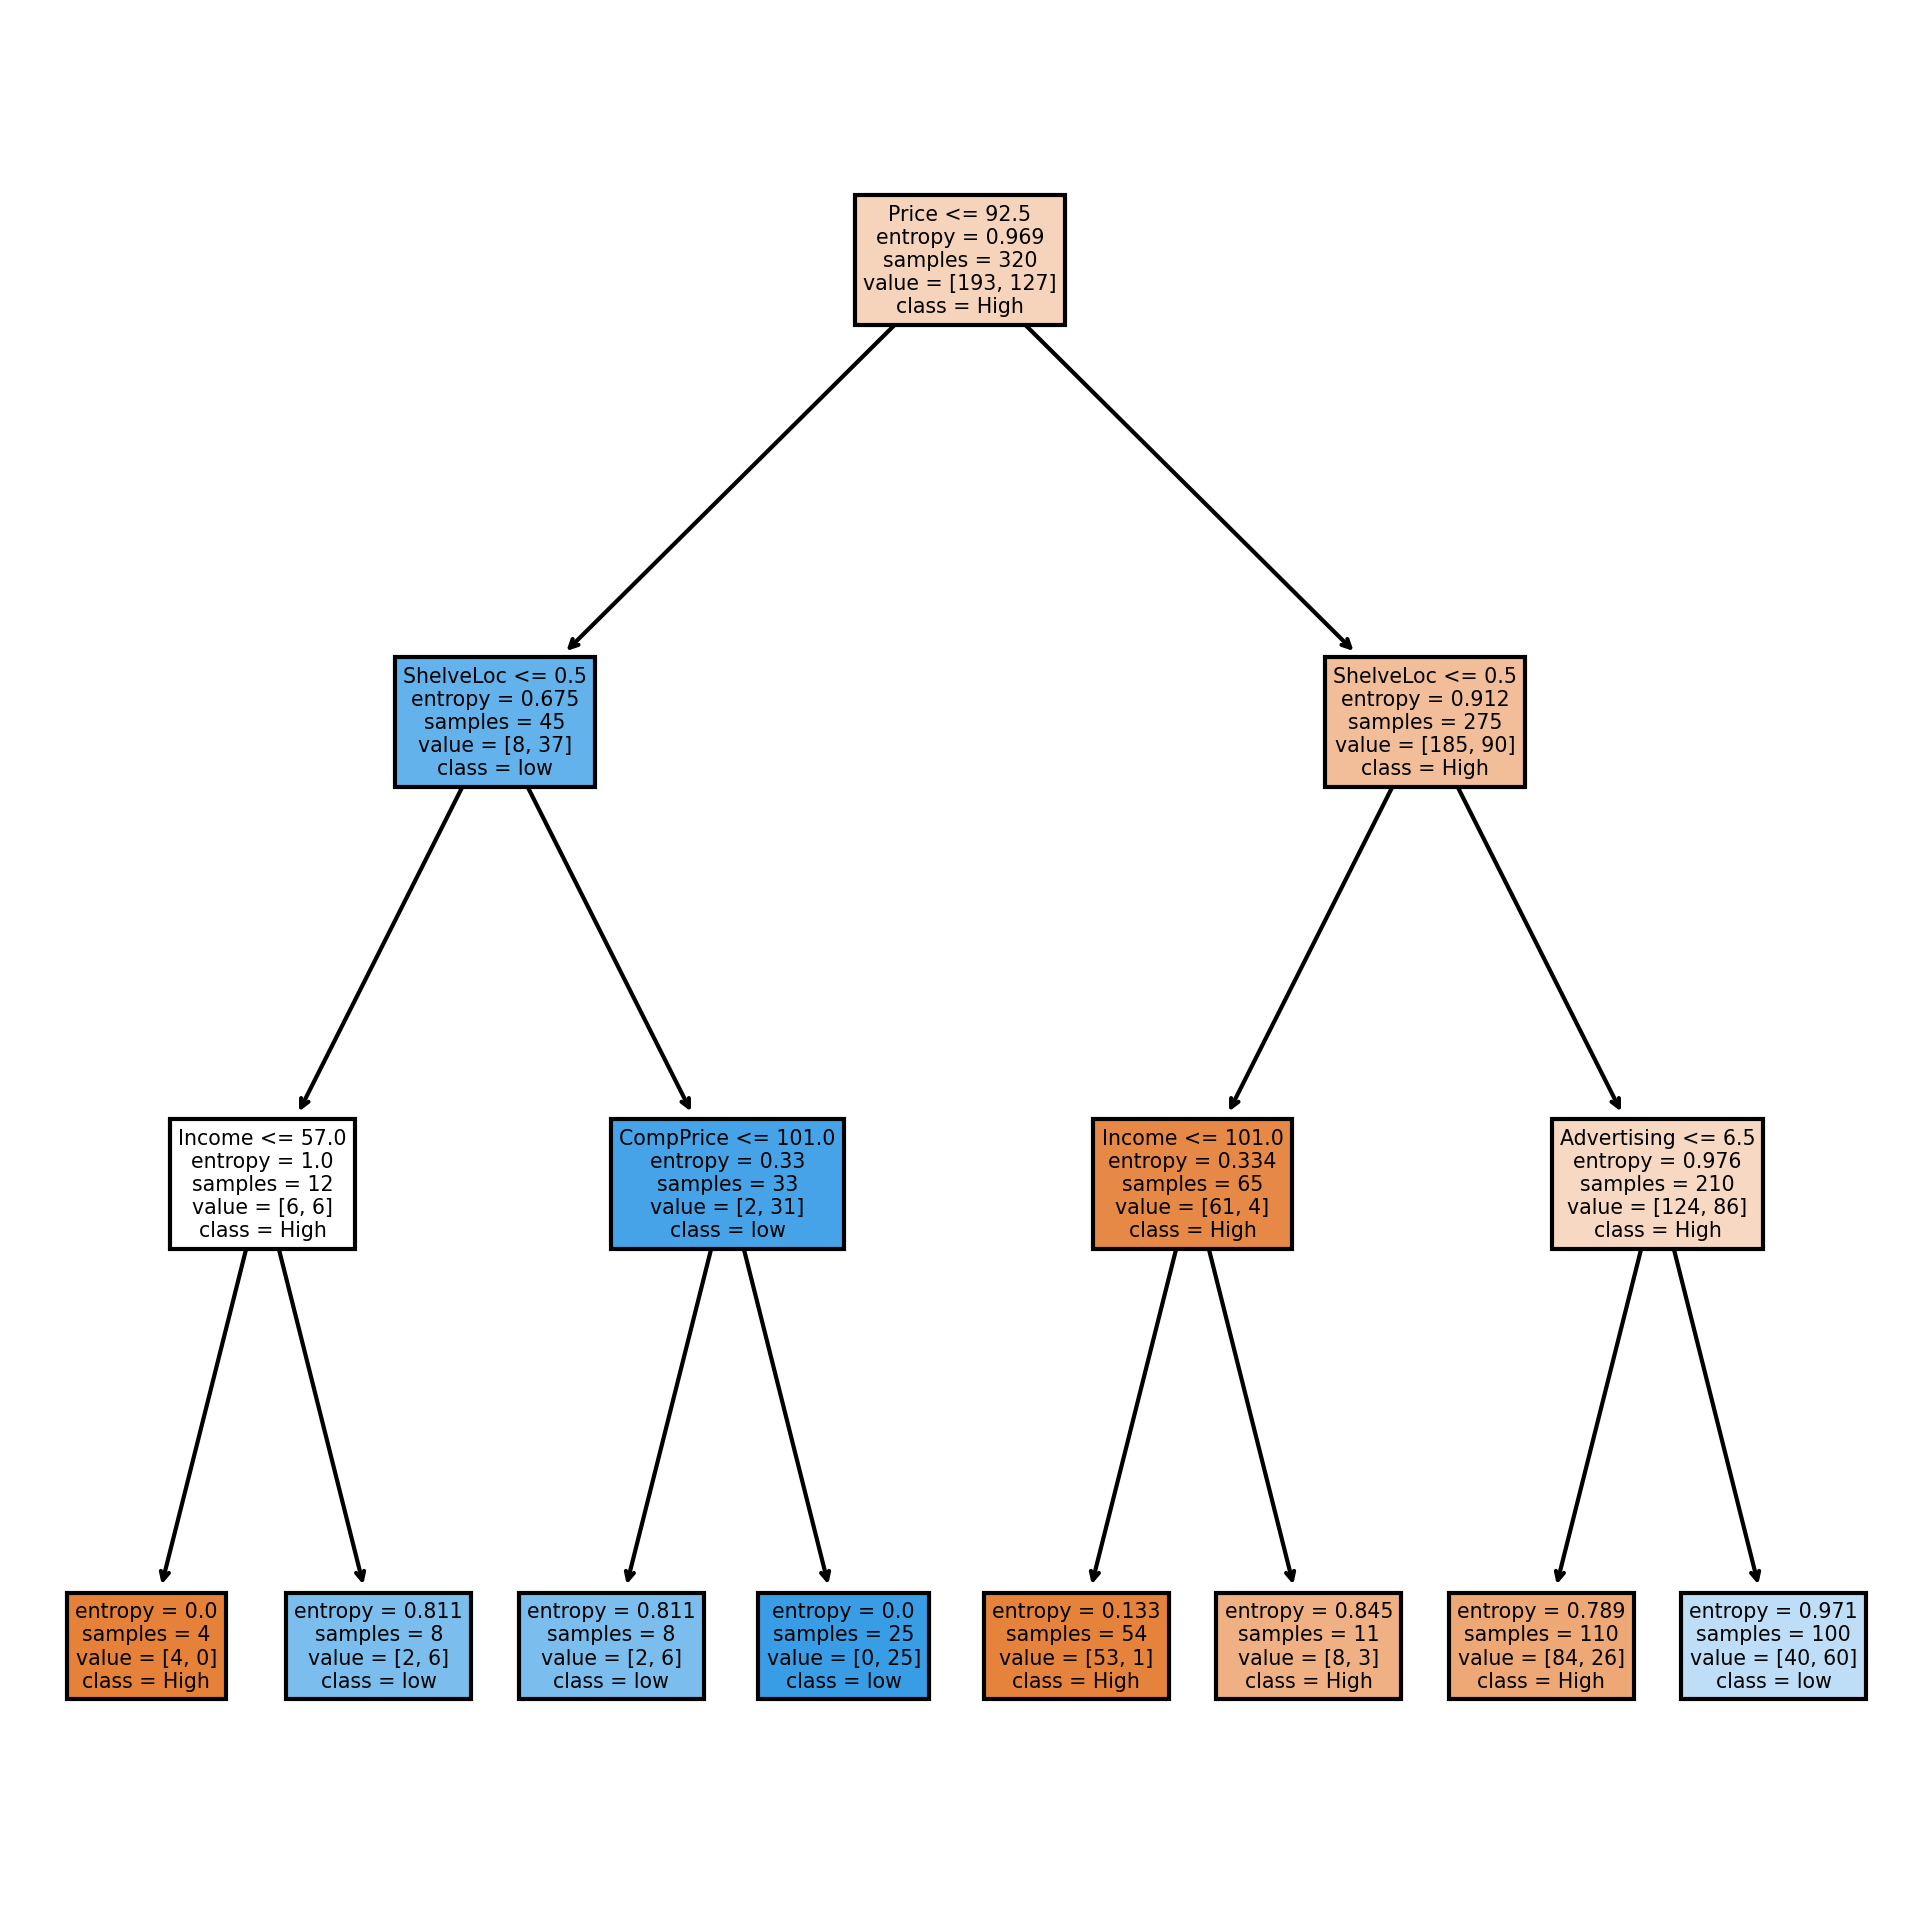

In [60]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']
cn= ['High','low']

fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [61]:
model.feature_importances_

array([0.04541483, 0.11063287, 0.21839812, 0.        , 0.2985952 ,
       0.32695898, 0.        , 0.        , 0.        , 0.        ])

In [62]:
preds= model.predict(X_test)
pd.Series(preds).value_counts()

Low     41
high    39
dtype: int64

In [63]:
pd.crosstab(y_test,preds)

col_0,Low,high
Sales,,
Low,32,11
high,9,28


In [64]:
np.mean(preds==y_test)

0.75

In [65]:
model = DecisionTreeClassifier(criterion='gini',max_depth = 3)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [66]:
pred=model.predict(X_test)

In [67]:
pd.Series(pred).value_counts()

Low     41
high    39
dtype: int64

In [68]:
np.mean(pred==y_test)

0.75